In [17]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing

In [18]:
col_names = ['Date_Time', 'Time', 'AreaA_Commuters', 'AreaB_Commuters', 'AreaC_Commuters', 'AreaD_Commuters','PeakTraffic', 'PreviousPriority','LargestArea', 'SecondLargestArea', 'Priority']
# load dataset
data = pd.read_csv("Traffic_Data.csv", header=0, names=col_names)
data.head()

,Date_Time,Time,AreaA_Commuters,AreaB_Commuters,AreaC_Commuters,AreaD_Commuters,PeakTraffic,PreviousPriority,LargestArea,SecondLargestArea,Priority
0,2019-09-01 7:00,7:00:00 AM,996,1214,1185,1017,True,X,B,C,B
1,2019-09-01 7:15,7:15:00 AM,1394,815,1299,601,True,B,A,C,A
2,2019-09-01 7:30,7:30:00 AM,1327,820,564,1466,True,A,D,A,D
3,2019-09-01 7:45,7:45:00 AM,1325,572,1273,1365,True,D,D,A,A
4,2019-09-01 8:00,8:00:00 AM,551,1283,1432,1097,True,A,C,B,C


In [19]:
#split dataset in features and target variable
feature_cols = ['PeakTraffic','LargestArea','SecondLargestArea', 'PreviousPriority']
X = data[feature_cols] # Features
y = data.Priority # Target variable

In [20]:
#1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = X.apply(le.fit_transform)
X_2.head()

,PeakTraffic,LargestArea,SecondLargestArea,PreviousPriority
0,1,1,2,4
1,1,0,2,1
2,1,3,0,0
3,1,3,0,3
4,1,2,1,0


In [21]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [22]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [23]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 1.0)


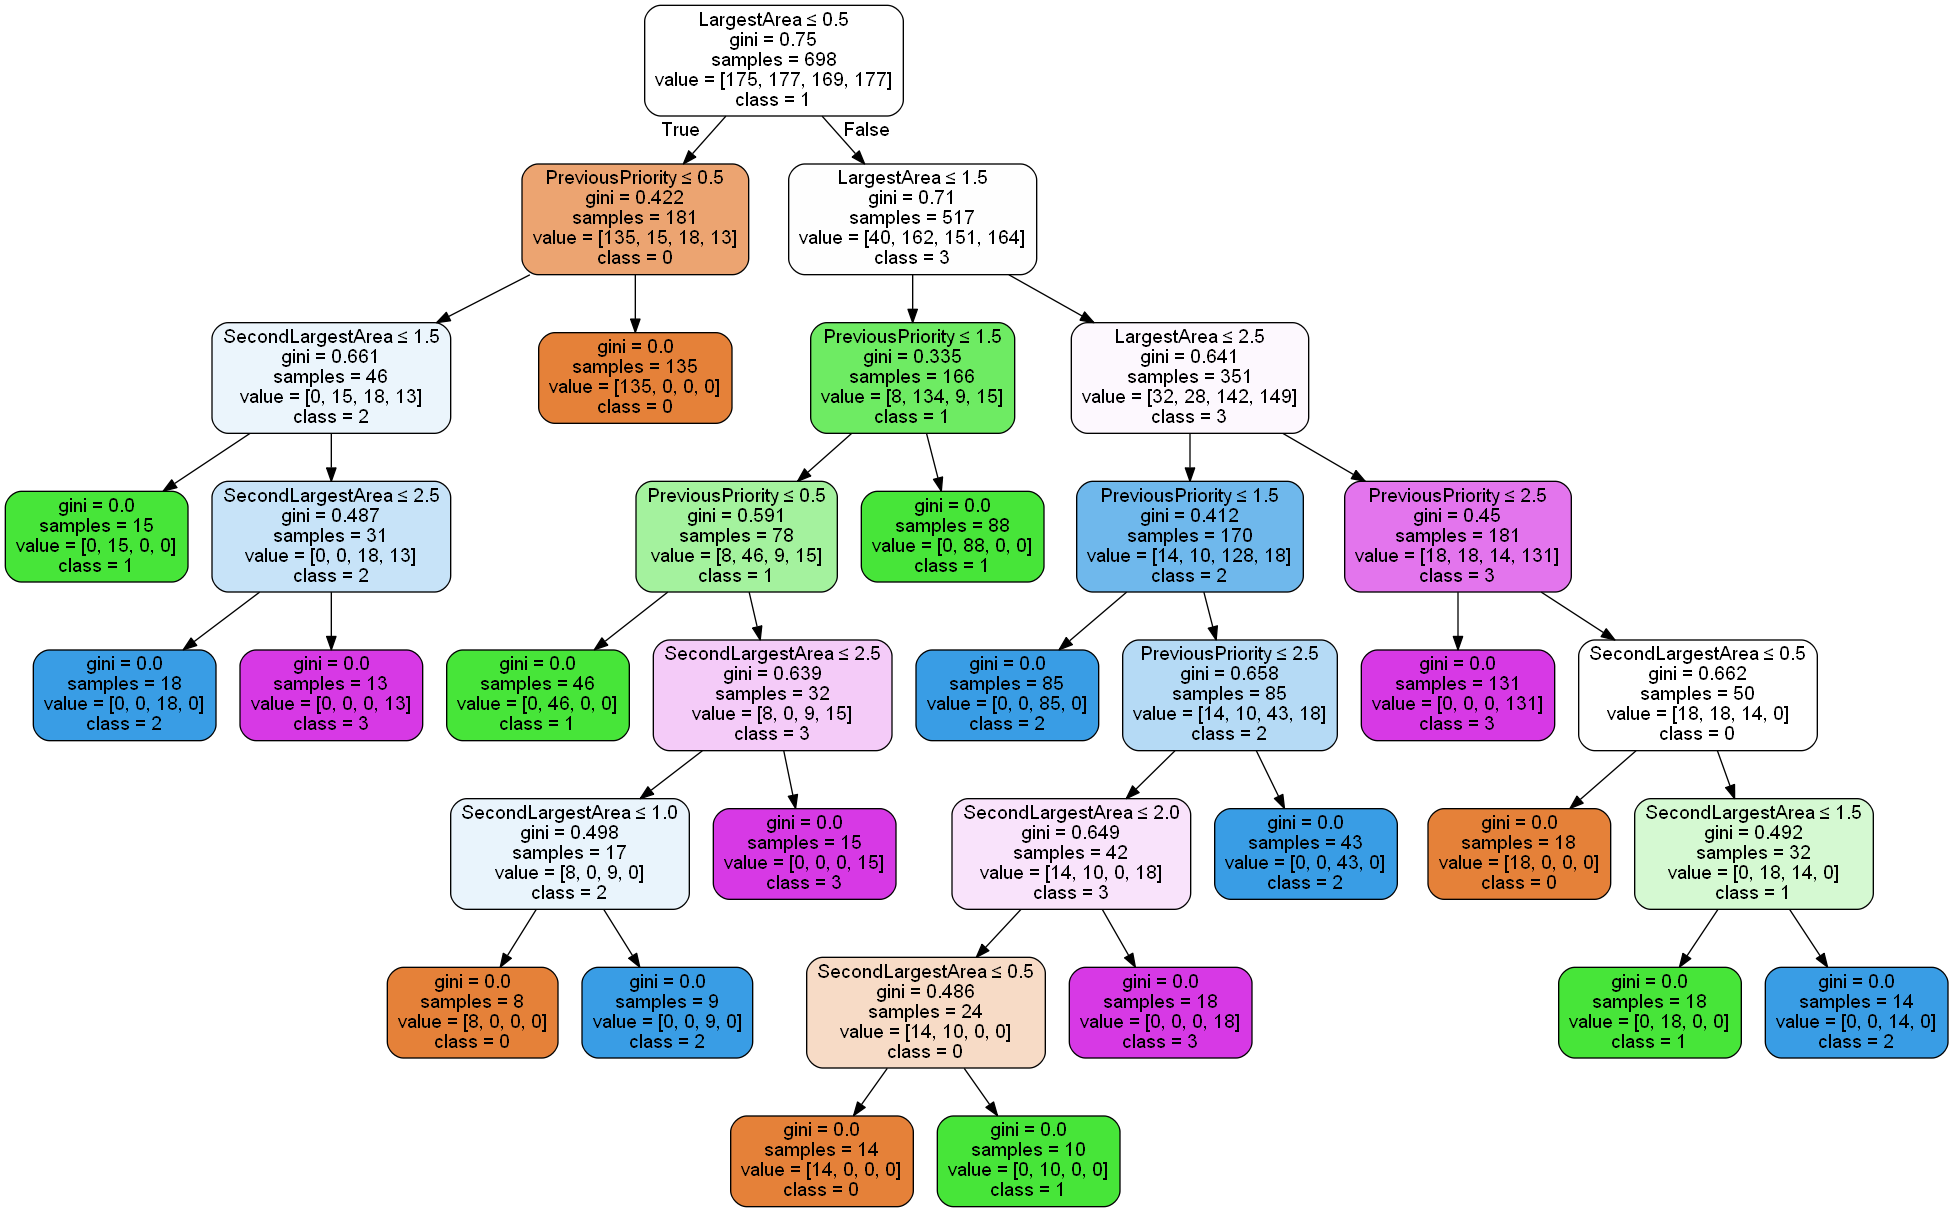

In [24]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('traffic.png')
Image(graph.create_png())